# Lab 8 - Nouh's demo

In [2]:
# As always, imports copied from lab sheet.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
# SVC meaning support vector CLASSIFIER rather than machine.

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# If this import fails, run
# conda install conda-forge::imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [3]:
wine = pd.read_csv("../labData/wine.csv")

In [4]:
wine.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type,quality_ind
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White,Low
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White,Low
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White,Low
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,Low
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,Low


In [5]:
# Normally, you do axis = 1 as an argument in this as well, though it works without.
# Nevertheless, in your actual work you should use it to show good practice.
wine.drop(columns = "Unnamed: 0", inplace = True)

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
 13  quality_ind           6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


<Axes: xlabel='type', ylabel='count'>

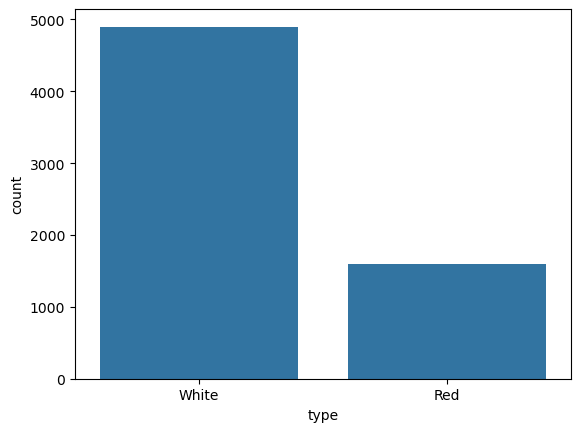

In [7]:
# Lab sheet drops type and quality_ind, the two object columns. Why?
sns.countplot(wine, x = "type")

<Axes: xlabel='quality_ind', ylabel='count'>

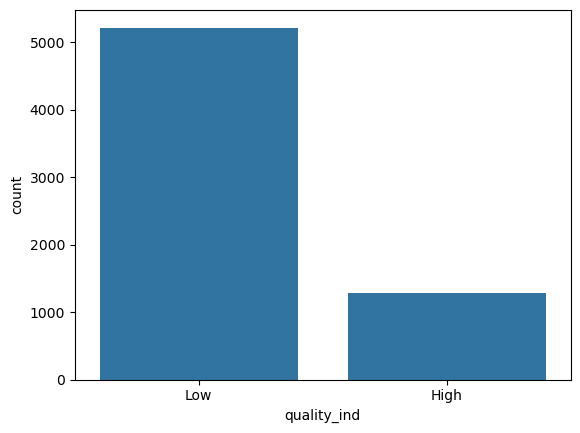

In [8]:
sns.countplot(wine, x = "quality_ind")

In [9]:
wine.drop(columns = ["type", "quality_ind"], axis = 1, inplace = True)
# I still don't really know why. I feel like this is related to previous knowledge of the dataset,
# as in he knew ahead of time they might not be relevant.
# ALTERNATIVELY, quality_ind is how we convert quality numeric to quality binary.
# Seems that type is irrelevant because we're just assessing wine quality as a whole, irrelevant of if it's red or white.

In [10]:
wine.isna().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: xlabel='quality', ylabel='count'>

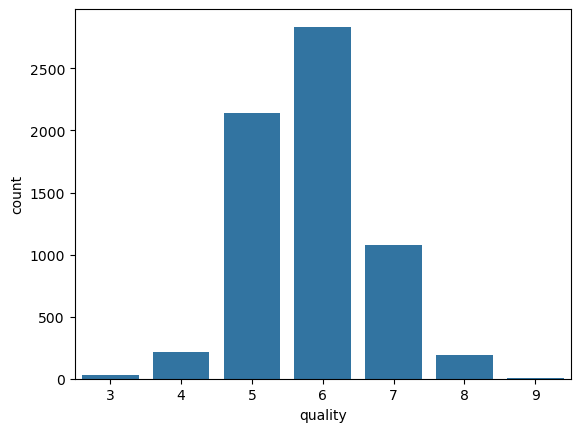

In [11]:
sns.countplot(wine, x = "quality")

In [12]:
# Switch to binary target column.
# Qualities 3 - 6 are LOW.
# Qualities 7 - 9 are HIGH.
wine['quality'] = wine['quality'].replace([3,4,5,6], 0)
wine['quality'] = wine['quality'].replace([7,8,9], 1)

<Axes: xlabel='quality', ylabel='count'>

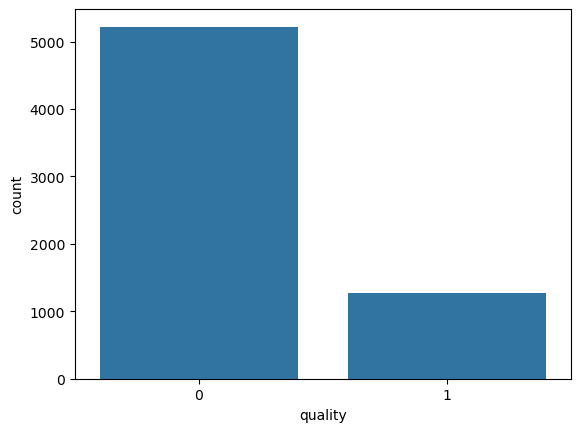

In [13]:
sns.countplot(wine, x = "quality")

In [16]:
wine["quality"].value_counts()

quality
0    5220
1    1277
Name: count, dtype: int64

In [17]:
from collections import Counter

In [18]:
# Another way to get value counts. This returns them as a dictionary.
Counter(wine["quality"]) 

Counter({0: 5220, 1: 1277})

Now we have our own issue though. We can clearly see the significant imbalance between wines of quality 0 and 1.
An ML model will therefore develop significant bias as it doesn't have enough data to learn from.

In [20]:
X = wine.drop(columns = "quality", axis = 1)
y = wine["quality"]

In [ ]:
y.value_counts() 

quality
0    5220
1    1277
Name: count, dtype: int64

In [22]:
smote = SMOTE()

In [23]:
X, y = smote.fit_resample(X, y)

In [ ]:
y.value_counts()
# Seems a bit like magic. I feel like more is going on here.

quality
0    5220
1    5220
Name: count, dtype: int64

# Random Forest Classifier

In [25]:
# By default, n_classifiers is 100. Making it 200 is an example of HYPERPARAMETER TUNING.
rf = RandomForestClassifier(n_estimators = 200)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
X_train.head(2)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
7441,6.415534,0.196893,0.376214,13.946603,0.039,47.563105,129.281552,0.996335,3.294078,0.646796,10.497087
7547,6.400000,0.220000,0.320000,7.200000,0.028,15.000000,83.000000,0.993000,3.130000,0.550000,10.900000


We need to standardise this data.

In [28]:
sc = StandardScaler()

In [29]:
# Note here that you only transform X_test, you do NOT fit-transform it.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
X_train

array([[-5.80891373e-01, -8.30080210e-01,  3.99838929e-01, ...,
         4.66908076e-01,  7.60938298e-01, -2.90492380e-01],
       [-5.92991252e-01, -6.73296063e-01, -3.90543785e-02, ...,
        -6.08296041e-01,  9.84976421e-02,  3.31571760e-02],
       [ 1.81777241e-03,  6.28214047e-01, -3.22955909e-01, ...,
         3.92516032e-01,  1.19348711e+00,  1.93817897e-01],
       ...,
       [ 1.35429672e+00,  5.48036213e-01,  1.44438679e+00, ...,
         6.36777968e-01,  2.49377586e+00,  2.04134082e+00],
       [ 7.31164567e-01, -3.34037098e-01,  1.95173175e-01, ...,
        -1.85241421e-02,  6.45989807e-01, -3.68479553e-01],
       [ 1.85923936e-01, -1.08040682e+00, -4.29433634e-01, ...,
        -2.11549089e+00, -7.22740605e-01, -1.73404443e+00]])

In [32]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

That takes a long time to run because you've told it to do 200 decision trees.

In [35]:
rf_acc = accuracy_score(y_pred, y_test)
rf_acc

0.9176245210727969

Is SMOTE using RNG but you didn't give a seed?

In [37]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1046
           1       0.94      0.90      0.92      1042

    accuracy                           0.92      2088
   macro avg       0.92      0.92      0.92      2088
weighted avg       0.92      0.92      0.92      2088



# Logistic Regression

In [38]:
lr = LogisticRegression()

In [39]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [40]:
lr_acc = accuracy_score(y_pred, y_test)
lr_acc

0.7308429118773946

SMOTE must be using RNG.

# Support Vector Machine (Classifier)

In [42]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [43]:
svm_acc = accuracy_score(y_pred, y_test)
svm_acc

0.8098659003831418

# Model evaulation

In [50]:
models = pd.DataFrame({
    "model" : ["RandomForest", "LogisticRegression", "SupportVectorMachine"],
    "accuracy" : [rf_acc, lr_acc, svm_acc]
})

models = models.sort_values(by = "accuracy", ascending = False)

<Axes: xlabel='model', ylabel='accuracy'>

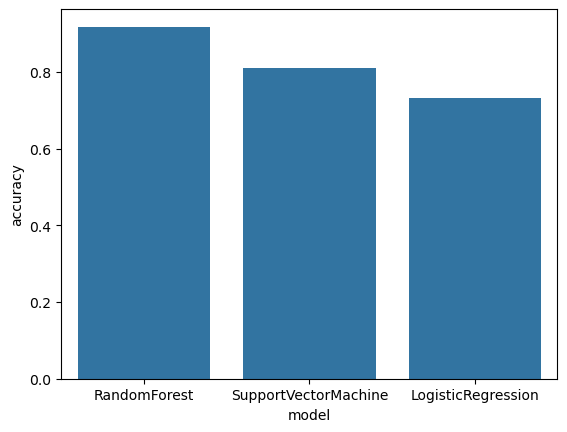

In [51]:
sns.barplot(data = models, x = "model", y = "accuracy")

# Prediction

In [52]:
wine.head(2)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,0


In [62]:
# This is the first row of the DF. Let's see if the model predicts it to be quality 0.
data = [7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8]

In [63]:
# It needs to be an NP array.
data = np.array(data)

In [64]:
# Apparently this is a "fatal error", and we can't do anything with this, because there is no Y.
data.shape

(11,)

In [65]:
# We fix it by reshaping it. Using 1, -1 flips it and adds a Y axis.
data = data.reshape(1, -1)
data.shape

(1, 11)

In [67]:
data = sc.transform(data)
data

d:\CondaEnvs\CMP6202\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.12564214, -0.3340371 ,  0.27324903,  3.51831647, -0.21564175,
         0.86530382,  1.06052135,  2.27240928, -1.46018878, -0.58586756,
        -1.65371708]])

In [71]:
def printMsg(pred):
    if pred[0] == 0:
        print("Low quality wine.")
    else:
        print("High quality wine.")

In [73]:
prediction = rf.predict(data)
printMsg(prediction)
# Correct on RF!

Low quality wine.


In [ ]:
prediction = lr.predict(data)
printMsg(prediction)
# Correct on LR!

Low quality wine.


In [ ]:
prediction = svm.predict(data)
printMsg(prediction)
# Correct on SVM!

Low quality wine.


All three got it right here, but they'd eventually give varying answers if you tried enough rows because of their differing accuracy scores.

In [75]:
wine[wine["quality"] == 1].head(2)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
13,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,1
15,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,1


In [77]:
data = [6.6, 0.16, 0.40, 1.5, 0.044, 48.0, 143.0, 0.9912, 3.54, 0.52, 12.4]
data = np.array(data)
data = data.reshape(1, -1)
data = sc.transform(data)

d:\CondaEnvs\CMP6202\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [78]:
printMsg(rf.predict(data))
printMsg(lr.predict(data))
printMsg(svm.predict(data))

High quality wine.
High quality wine.
High quality wine.
